In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind
from matplotlib.patches import Patch

## Data

In [2]:
multi = pd.read_csv('multi2.csv')
single = pd.read_csv('single.csv')

properties = single.columns

## Visualization

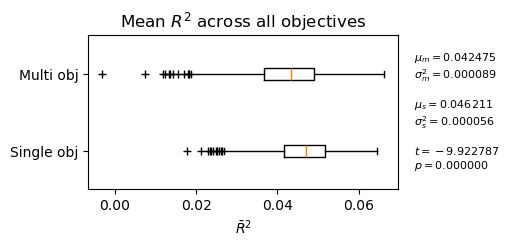

In [3]:
fig, ax = plt.subplots(figsize=(4, 2))

m, s = multi.mean(axis=1), single.mean(axis=1)
tstat, pval = ttest_ind(m, s, equal_var=False)

ax.boxplot(
    x=[s, m], tick_labels=['Single obj', 'Multi obj'], 
    vert=False, sym='+', 
)
#ax.axvline(m.mean(), ymax=0.1, color='orange')

ax.set_xlabel(r'$\bar{R}^2$')
ax.set_title('Mean $R^2$ across all objectives')
#ax.legend()

txt = f"$\mu_m = {m.mean():2f}$ \n"
txt += f"$\sigma_m^2 = {m.var():2f}$ \n\n"
txt += f"$\mu_s = {s.mean():2f}$ \n"
txt += f"$\sigma_s^2 = {s.var():2f}$ \n\n"
txt += f"$t = {tstat:2f}$ \n"
txt += f"$p = {pval:2f}$"
ax.text(1.05, 0.9, txt, transform=ax.transAxes , fontsize=8, va='top');

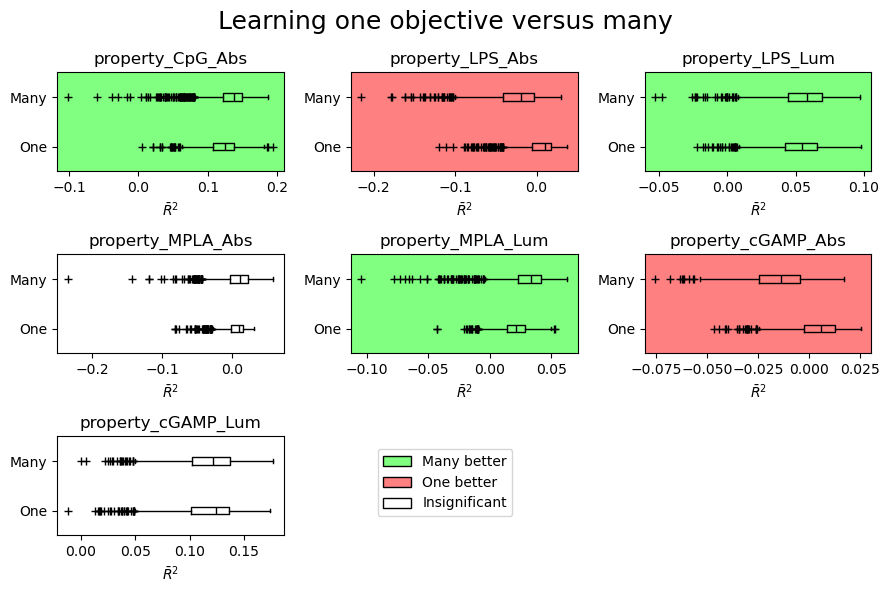

In [4]:
fig, axs = plt.subplots(3, 3, figsize=(9, 6))
axs = axs.flatten()

for i, property_label in enumerate(properties):

    ax = axs[i]

    m, s = multi.iloc[:, i], single.iloc[:, i]
    tstat, pval = ttest_ind(m, s, equal_var=False)

    ax.boxplot(
        x=[s, m], tick_labels=['One', 'Many'], 
        vert=False, sym='+', 
        medianprops={'color': 'black'}
    )

    color=(1, 1, 1)
    if pval < 0.05:
        if tstat > 0: color = (0.5, 1, 0.5)
        else: color = (1, 0.5, 0.5)
    ax.set_facecolor(color)
    ax.set_xlabel(r'$\bar{R}^2$')
    ax.set_title(property_label)
    #ax.legend()

axs[-1].axis('off')
axs[-2].axis('off')

legend_elements = [
    Patch(facecolor=(0.5, 1, 0.5), edgecolor='black', label='Many better'), 
    Patch(facecolor=(1, 0.5, 0.5), edgecolor='black', label='One better'), 
    Patch(facecolor=(1, 1, 1), edgecolor='black', label='Insignificant')
]
fig.legend(handles=legend_elements, bbox_to_anchor=(0.5, 0.125), loc='lower center')
fig.suptitle('Learning one objective versus many', fontsize=18)

plt.tight_layout()